# Predicting Blood Glucose Level - Dataset Description

## Introduction

This Jupyter Notebook aims to predict blood glucose levels in individuals using a dataset containing various health-related attributes. Predicting blood glucose levels is of paramount importance in managing and preventing diabetes, a chronic medical condition characterized by elevated blood glucose levels. Accurate predictions can aid healthcare professionals and patients in making informed decisions regarding treatment and lifestyle modifications.

## Dataset Description

The dataset used for this predictive modeling task consists of the following attributes:

1. **Pregnancies:** The number of times the individual has been pregnant.
2. **Glucose:** The plasma glucose concentration in a 2-hour oral glucose tolerance test.
3. **Diastolic:** Diastolic blood pressure (mm Hg).
4. **Triceps:** Triceps skinfold thickness (mm).
5. **Insulin:** 2-hour serum insulin (mu U/ml).
6. **BMI:** Body mass index (weight in kg / (height in m)^2).
7. **DPF (Diabetes Pedigree Function):** A function that scores the likelihood of diabetes based on family history.
8. **Age:** Age in years.
9. **Diabetes:** A binary variable (1 for diabetic, 0 for non-diabetic) indicating whether the individual has diabetes.

## Data Sample

Here's a sample of the dataset:

| Pregnancies | Glucose | Diastolic | Triceps | Insulin | BMI  | DPF   | Age | Diabetes |
|-------------|---------|-----------|---------|---------|------|-------|-----|----------|
| 6           | 148     | 72        | 35      | 0       | 33.6 | 0.627 | 50  | 1        |
| 1           | 85      | 66        | 29      | 0       | 26.6 | 0.351 | 31  | 0        |
| 8           | 183     | 64        | 0       | 0       | 23.3 | 0.672 | 32  | 1        |
| 1           | 89      | 66        | 23      | 94      | 28.1 | 0.167 | 21  | 0        |
| 0           | 137     | 40        | 35      | 168     | 43.1 | 2.288 | 33  | 1        |
| 5           | 116     | 74        | 0       | 0       | 25.6 | 0.201 | 30  | 0        |
| 3           | 78      | 50        | 32      | 88      | 31   | 0.248 | 26  | 1        |
| 10          | 115     | 0         | 0       | 0       | 35.3 | 0.134 | 29  | 0        |
| 2           | 197     | 70        | 45      | 543     | 30.5 | 0.158 | 53  | 1        |
| 8           | 125     | 96        | 0       | 0       | 37.6 | 0.191 | 30  | 0        |

This dataset provides valuable information about individuals' health and their diabetes status. The goal is to build a predictive model that can accurately predict blood glucose levels based on these attributes, contributing to better diabetes management and healthcare decision-making.

Please follow along with the code and analysis in this notebook to understand the process of building and evaluating the predictive model for blood glucose level prediction.


In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define a custom style
custom_style = {
    'axes.facecolor': 'lightgray',  # Background color for the plot area
    'grid.color': 'white',         # Color of grid lines
    'axes.edgecolor': 'black',     # Color of axes edges
    'xtick.color': 'black',        # Color of x-axis ticks
    'ytick.color': 'black',        # Color of y-axis ticks
}

# Apply the custom style
sns.set(style='whitegrid', rc=custom_style)

In [3]:
# Load data
df = pd.read_csv('diabetes_clean.csv')
df.shape

(768, 9)

In [4]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Missing Value Treatment

In [7]:
def visualize_missing_data(df, height=None, width=None, heatmap=True, cmap='YlGnBu') -> None:
    """
    Visualize missing data in a DataFrame, inspect categorical features, and provide insights.

    Parameters:
    - df: pd.DataFrame
        The DataFrame to analyze.
    - height: int, optional
        The height of the figure for the heatmap. Default is None.
    - width: int, optional
        The width of the figure for the heatmap. Default is None.
    - heatmap: bool, optional
        Whether to display a heatmap of missing data. Default is True.

    Returns:
    - None
    """
    # Check for missing values
    missing_data = df.isnull()
    total_missing = missing_data.sum()
    percent_missing = (missing_data.sum() / len(df)) * 100

    # Create a summary DataFrame
    missing_info = pd.DataFrame({'Total Missing': total_missing, 'Percent Missing': percent_missing})
    missing_info = missing_info[missing_info['Total Missing'] > 0].sort_values(by='Percent Missing', ascending=False)

    # Display missing data info
    print("\033[1mMissing Data Information\033[0m")
    display(missing_info)

    # Analyze categorical features
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_features:
        print("\n\033[1mCategorical Feature Analysis\033[0m")
        for feature in categorical_features:
            unique_values = df[feature].unique()
            print(f"\n\033[1mFeature: {feature}\033[0m")
            print(f"Number of Unique Values: {len(unique_values)}")
            print("Unique Values:", unique_values)
            
            # Check for special characters in categorical data
            special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '{', '}', '[', ']', '|', '\\', ';', ':', "'", '"', '<', '>', ',', '.', '?', '/', '~', '`']
            has_special_characters = any(df[feature].str.contains('|'.join(map(re.escape, special_characters)), na=False))
            if has_special_characters:
                print("\n\033[1mSpecial Characters Detected!\033[0m")
                print("Recommendation: Consider removing or replacing special characters.")
            else:
                print("\n\033[1mNo Special Characters Detected\033[0m")
                
            # Check for consistent binary values
            if len(unique_values) == 2:
                print("\n\033[1mBinary feature detected\033[0m.")
                print("Recommendation: Check if binary values are consistent (e.g., 'Yes'/'No', 'True'/'False').")
            else:
                print("\n\033[1mNo binary feature detected\033[0m.")
                
            # Check cardinality and provide recommendations
            if len(unique_values) < 10:
                print("\n\033[1mLow cardinality feature detected\033[0m.")
                print("Recommendation: Check for consistency and consider one-hot encoding.")
            else:
                print("\n\033[1mHigh cardinality feature detected\033[0m.")
                print("Recommendation: Review and possibly reduce cardinality through grouping or feature engineering.")
            
            # Check for inconsistent capitalization
            unique_values_lower = [value.lower() for value in unique_values if isinstance(value, str)]
            unique_values_lower_set = set(unique_values_lower)
            if len(unique_values_lower_set) != len(unique_values):
                print("Inconsistent Capitalization Detected!")
                print("Recommendation: Standardize capitalization (e.g., convert all values to lowercase).")

            # Check for redundant or similar categories
            def is_similar(value1, value2):
                return value1.lower().replace(" ", "") == value2.lower().replace(" ", "")

            similar_categories = []
            for i, value1 in enumerate(unique_values):
                for j, value2 in enumerate(unique_values):
                    if i != j and is_similar(str(value1), str(value2)):
                        similar_categories.append((value1, value2))
            if similar_categories:
                print("Redundant or Similar Categories Detected!")
                print("Recommendation: Consolidate similar categories into a single category.")
                print("Similar Category Pairs:")
                for pair in similar_categories:
                    print(pair)
               
    # Check numerical features for non-numeric entries
    numerical_features = df.select_dtypes(include=['number']).columns.tolist()
    if numerical_features:
        print("\n\033[1mNumerical Feature Analysis\033[0m")
        for feature in numerical_features:
            if df[feature].apply(lambda x: isinstance(x, (int, float))).all():
                print(f"\n\033[1mFeature: {feature}\033[0m")
                print("All entries are numeric.")
            else:
                print(f"\n\033[1mFeature: {feature}\033[0m")
                print("Non-numeric entries detected.")
                print("Recommendation: Check and clean non-numeric entries if necessary.")
                
    # Create and display a heatmap
    if heatmap:
        if height and width:
            plt.figure(figsize=(width, height))
        elif height:
            plt.figure(figsize=(6, height))
        elif width:
            plt.figure(figsize=(width, 6))
        else:
            plt.figure()
        sns.heatmap(missing_data, cbar=False, cmap=cmap)
        plt.title('Missing Data Heatmap', fontsize=12)
        plt.xlabel('Columns')
        plt.ylabel('Rows')
        plt.show()

Missing Data Information


,Total Missing,Percent Missing



Numerical Feature Analysis

Feature: pregnancies
All entries are numeric.

Feature: glucose
All entries are numeric.

Feature: diastolic
All entries are numeric.

Feature: triceps
All entries are numeric.

Feature: insulin
All entries are numeric.

Feature: bmi
All entries are numeric.

Feature: dpf
All entries are numeric.

Feature: age
All entries are numeric.

Feature: diabetes
All entries are numeric.


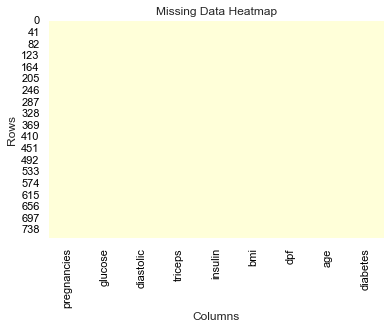

In [8]:
visualize_missing_data(df)

## EDA

In [9]:
def histogram_plots(dataframe, numeric_columns=None, kde=True, subplot_height=2, subplot_width=4, plots_per_row=2) -> None:
    """
    Generate histogram plots for numeric columns in a given DataFrame.

    Parameters:
        dataframe (pandas.DataFrame): The DataFrame containing the data.
        numeric_columns (list, optional): The list of numeric columns to create histograms for. If None, all numeric columns in the DataFrame will be used. Defaults to None.
        kde (bool, optional): Whether to include a kernel density estimate in the histogram. Defaults to False.
        subplot_height (int, optional): The height of each subplot in inches. Defaults to 2.
        subplot_width (int, optional): The width of each subplot in inches. Defaults to 4.
        plots_per_row (int, optional): The number of plots to display per row. Defaults to 2.

    Returns:
        None
    """
    # If numeric_columns is None, get the numeric columns in the DataFrame
    if numeric_columns is None:
        numeric_columns = dataframe.select_dtypes(include=[np.number]).columns

    # Calculate summary statistics for numeric columns
    summary_stats = dataframe[numeric_columns].describe()

    # Calculate the number of rows needed for the subplots
    num_rows = len(numeric_columns) // plots_per_row + (len(numeric_columns) % plots_per_row > 0)

    # Calculate the total figure height based on the number of rows and subplot height
    fig_height = num_rows * (subplot_height + 2)  # Add extra height for summary statistics

    # Create subplots with the specified height and width
    fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(subplot_width * plots_per_row, fig_height), squeeze=False)

    # Loop through each numeric column and create a histogram with or without KDE
    for i, col in enumerate(numeric_columns):
        row = i // plots_per_row  # Calculate the row index
        col_num = i % plots_per_row  # Calculate the column index
        
        # Plot histogram with optional KDE
        sns.histplot(data=dataframe, x=col, kde=kde, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Histogram: {col}')
        axes[row, col_num].set_xlabel(col)
        if kde:
            axes[row, col_num].set_ylabel('Density')
        else:
            axes[row, col_num].set_ylabel('Count')
        
        # Display summary statistics as text
        summary_text = summary_stats[col].to_string(index=False)
        axes[row, col_num].annotate(summary_text, xy=(0.7, 0.85), xycoords='axes fraction')

    # Remove empty subplots if the number of plots is odd
    if len(numeric_columns) % plots_per_row != 0:
        for j in range(len(numeric_columns) % plots_per_row, plots_per_row):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

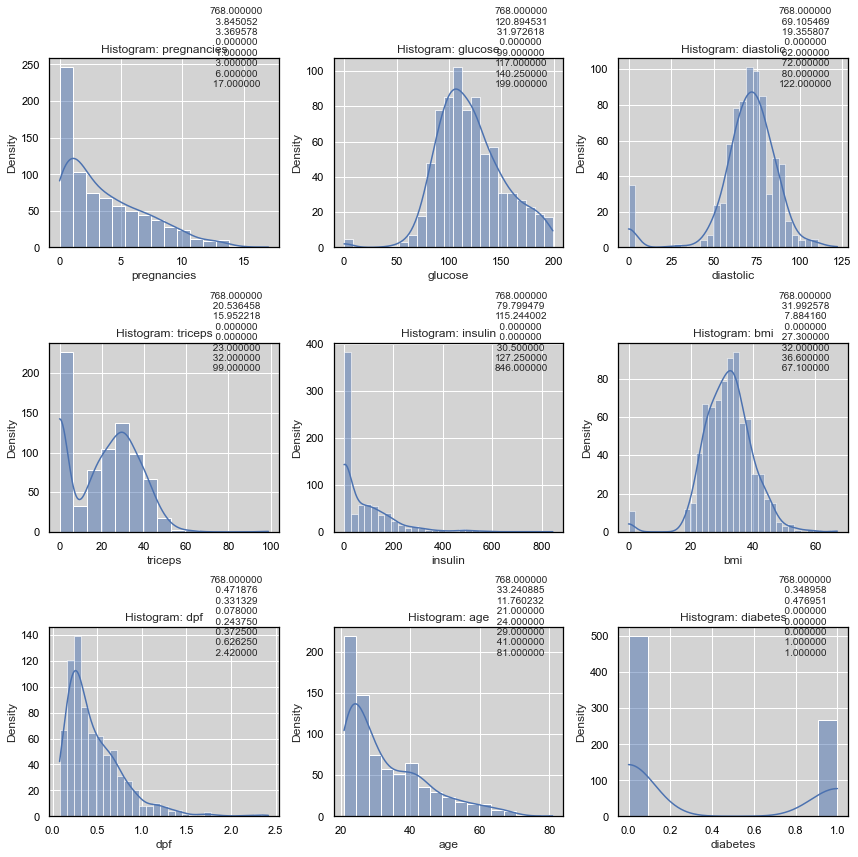

In [10]:
# Plot histograms
histogram_plots(df, plots_per_row=3)

In [11]:
def scatter_plots(dataframe, target_column, numeric_columns=None, hue=None, subplot_height=3, subplot_width=6, plots_per_row=2) -> None:
    """
    Create scatter plots for numeric columns in a dataframe against a target column.
    
    Args:
        dataframe (pd.DataFrame): The dataframe containing the data.
        target_column (str): The name of the target column.
        numeric_columns (List[str]): Optional. The list of numeric columns to create scatter plots for.
                                     If None, all numeric columns excluding the target column will be used.
        hue (str): Optional. The name of the column used for color encoding.
        subplot_height (int): Optional. The height of each subplot in inches.
        subplot_width (int): Optional. The width of each subplot in inches.
        plots_per_row (int): Optional. The number of plots per row.
        
    Returns:
        None
    """
    # If numeric_columns is None, get the numeric columns in the DataFrame excluding the target column
    if numeric_columns is None:
        numeric_columns = [col for col in dataframe.columns if col != target_column 
                           and np.issubdtype(dataframe[col].dtype, np.number)]

    # Calculate the number of rows needed for the subplots
    num_rows = len(numeric_columns) // plots_per_row + (len(numeric_columns) % plots_per_row > 0)

    # Calculate the total figure height based on the number of rows and subplot height
    fig_height = num_rows * subplot_height

    # Create subplots with the specified height and width
    fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, 
                             figsize=(subplot_width * plots_per_row, fig_height), squeeze=False)

    # Loop through each numeric column and create a scatter plot with the target
    for i, col in enumerate(numeric_columns):
        row = i // plots_per_row  # Calculate the row index
        col_num = i % plots_per_row  # Calculate the column index
        if hue:
            sns.scatterplot(data=dataframe, x=col, y=target_column, hue=hue, ax=axes[row, col_num])
        else:
            sns.scatterplot(data=dataframe, x=col, y=target_column, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Scatter Plot: {col} vs. {target_column}')
        axes[row, col_num].set_xlabel(col)
        axes[row, col_num].set_ylabel(target_column)

    # Remove empty subplots if the number of plots is odd
    if len(numeric_columns) % plots_per_row != 0:
        for j in range(len(numeric_columns) % plots_per_row, plots_per_row):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

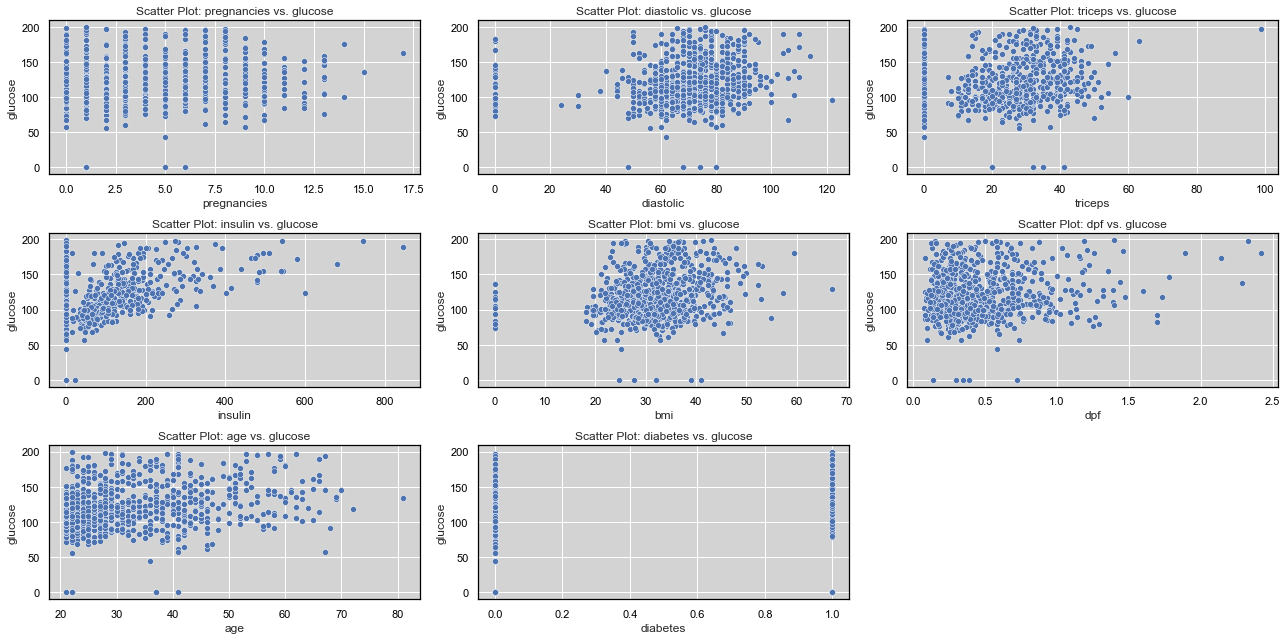

In [12]:
# Plot scatter plots
scatter_plots(dataframe=df, target_column='glucose', plots_per_row=3)

In [13]:
def analyze_skewness_and_kurtosis(df):
    """
    Analyze skewness and kurtosis for numerical features in a DataFrame side by side.

    Parameters:
        df (DataFrame): The DataFrame containing numerical features.

    Returns:
        None
    """
    # Select numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64'])

    num_plots = len(numerical_features.columns)

    fig, axes = plt.subplots(num_plots, 2, figsize=(6, 3 * num_plots))

    for i, column in enumerate(numerical_features.columns):
        # Skewness
        skew_value = skew(df[column])
        sns.boxplot(data=df, y=column, ax=axes[i, 0])
        axes[i, 0].set_title(f'Skewness: {skew_value:.2f}', fontsize=10)
        axes[i, 0].set_ylabel('')
        axes[i, 0].set_xlabel(column)

        # Kurtosis
        kurtosis_value = kurtosis(df[column])
        sns.kdeplot(data=df, x=column, fill=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Kurtosis: {kurtosis_value:.2f}', fontsize=10)
        axes[i, 1].set_ylabel('')
        axes[i, 1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

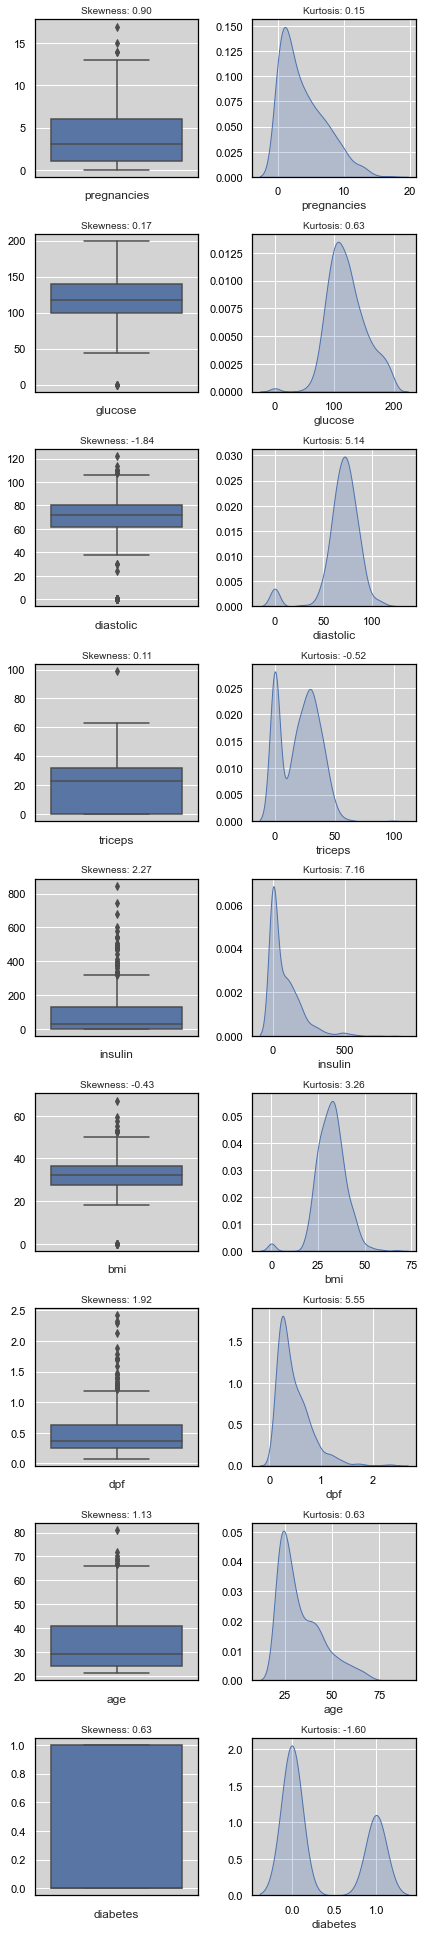

In [14]:
analyze_skewness_and_kurtosis(df)

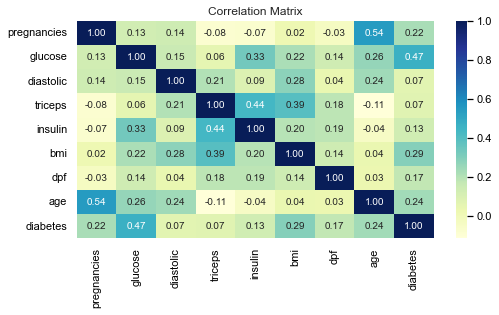

In [15]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

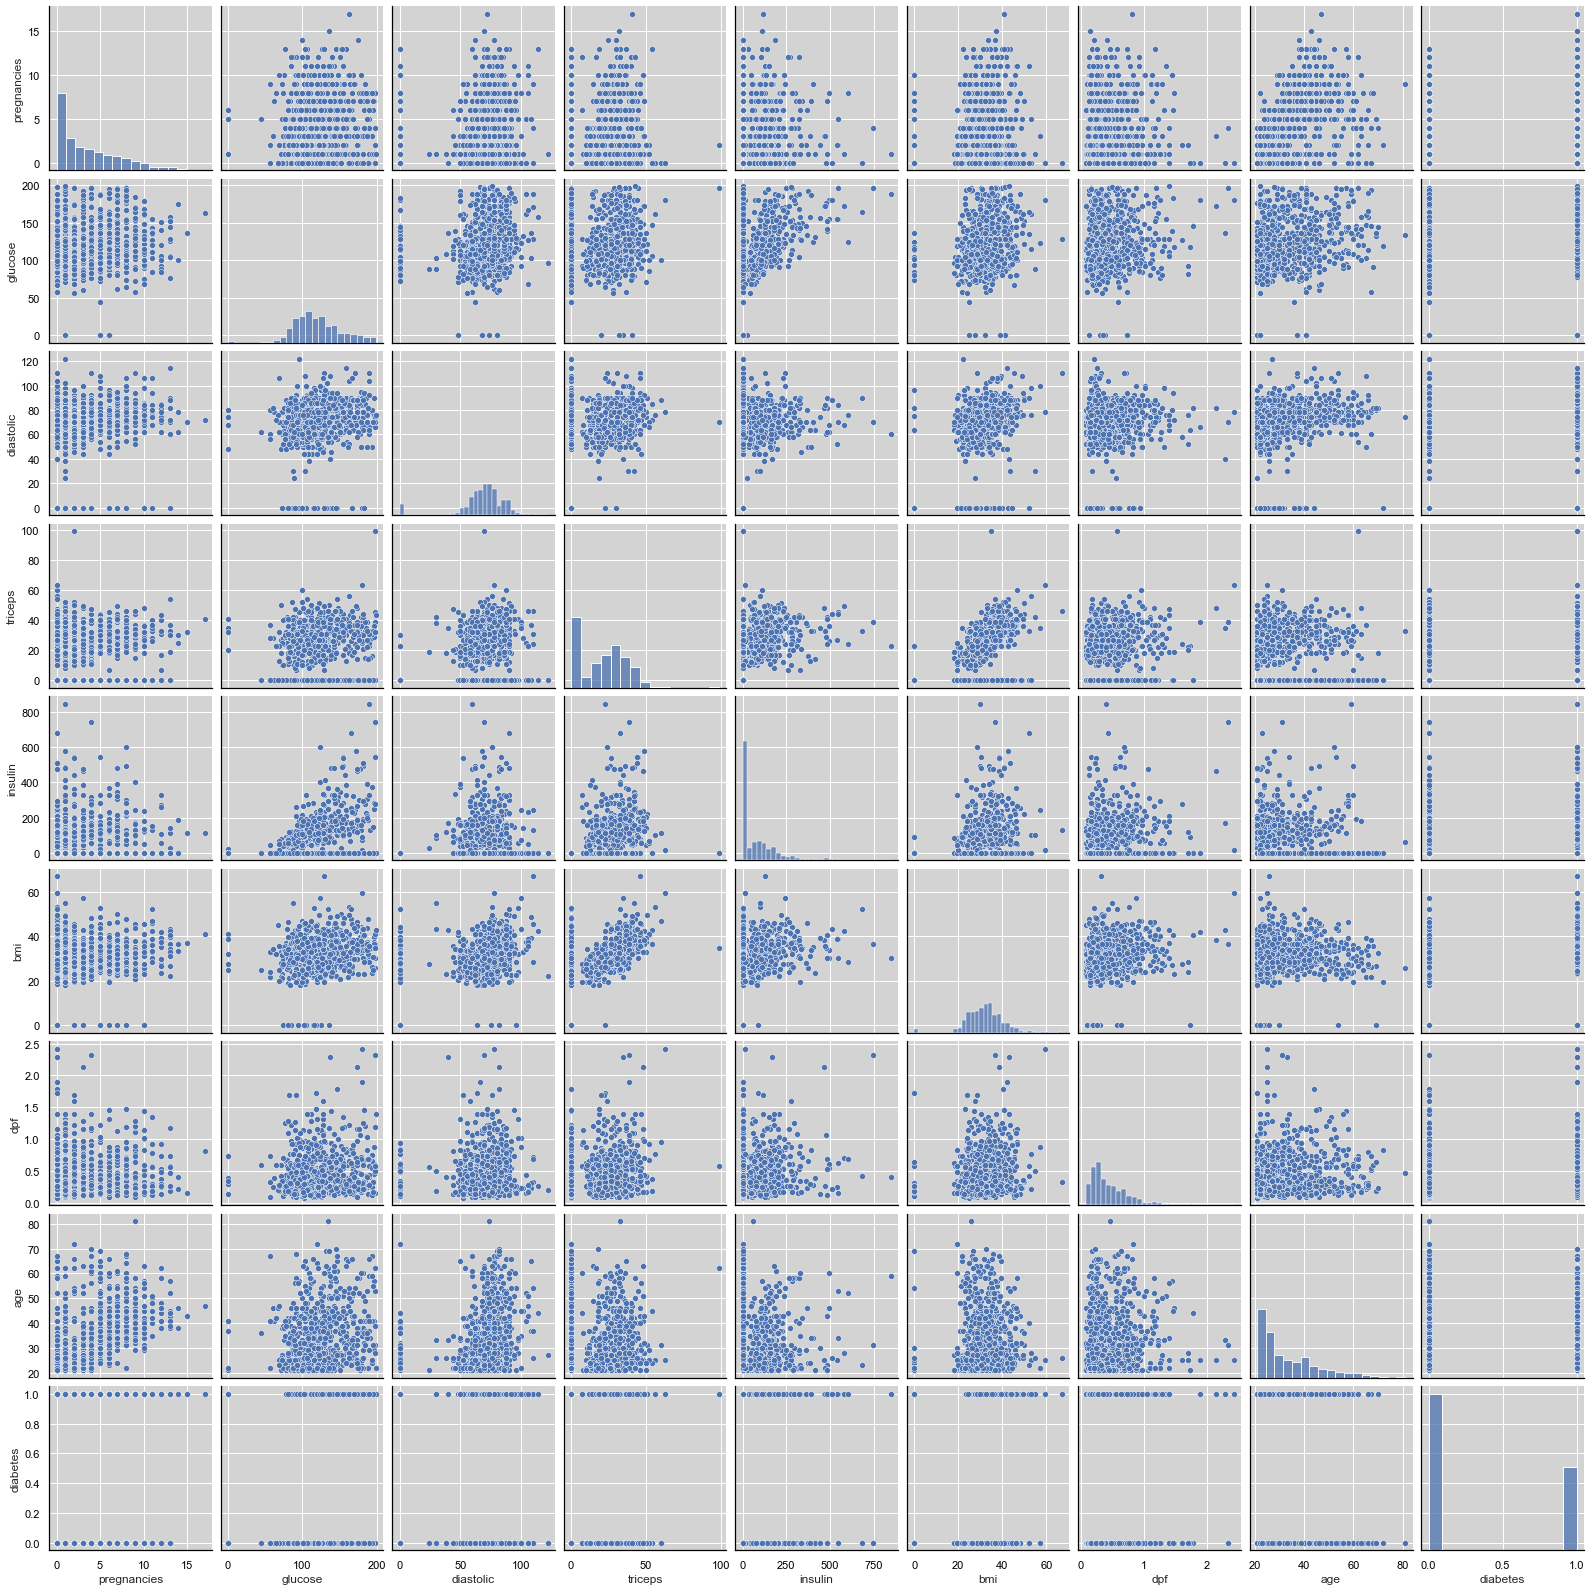

In [16]:
# Create pair plots to visualize pairwise relationships between numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(df[numerical_features.columns])
plt.show()

## Outlier Treatment

In [17]:
def box_plots(dataframe, numeric_columns=None, subplot_height=3, subplot_width=10, plots_per_row=2) -> None:
    """
    Generates a set of box plots for numeric columns in a given DataFrame.

    Parameters:
    - dataframe: The DataFrame containing the data for the box plots.
    - numeric_columns: A list of column names containing numeric data. If None, all numeric columns in the DataFrame will be used.
    - subplot_height: The height of each subplot in inches. Default is 3.
    - subplot_width: The width of each subplot in inches. Default is 10.
    - plots_per_row: The number of box plots to display per row. Default is 2.

    Returns:
    None
    """
    # If numeric_columns is None, get the numeric columns in the DataFrame
    if numeric_columns is None:
        numeric_columns = dataframe.select_dtypes(include=[np.number]).columns

    # Calculate the number of rows needed for the subplots
    num_rows = len(numeric_columns) // plots_per_row + (len(numeric_columns) % plots_per_row)

    # Calculate the total figure height based on the number of rows and subplot height
    fig_height = num_rows * subplot_height

    # Calculate the number of columns based on the specified plots_per_row
    num_cols = min(plots_per_row, len(numeric_columns))

    # Create subplots with the specified height and width
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(subplot_width * num_cols, fig_height))

    # Loop through each numeric column and create a box plot
    for i, col in enumerate(numeric_columns):
        row = i // num_cols  # Calculate the row index
        col_num = i % num_cols  # Calculate the column index
        sns.boxplot(data=dataframe, x=col, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Box Plot of {col}')
        axes[row, col_num].set_xlabel(col)

    # Remove empty subplots if the number of plots is odd
    if len(numeric_columns) % num_cols != 0:
        for j in range(len(numeric_columns) % num_cols, num_cols):
            fig.delaxes(axes[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

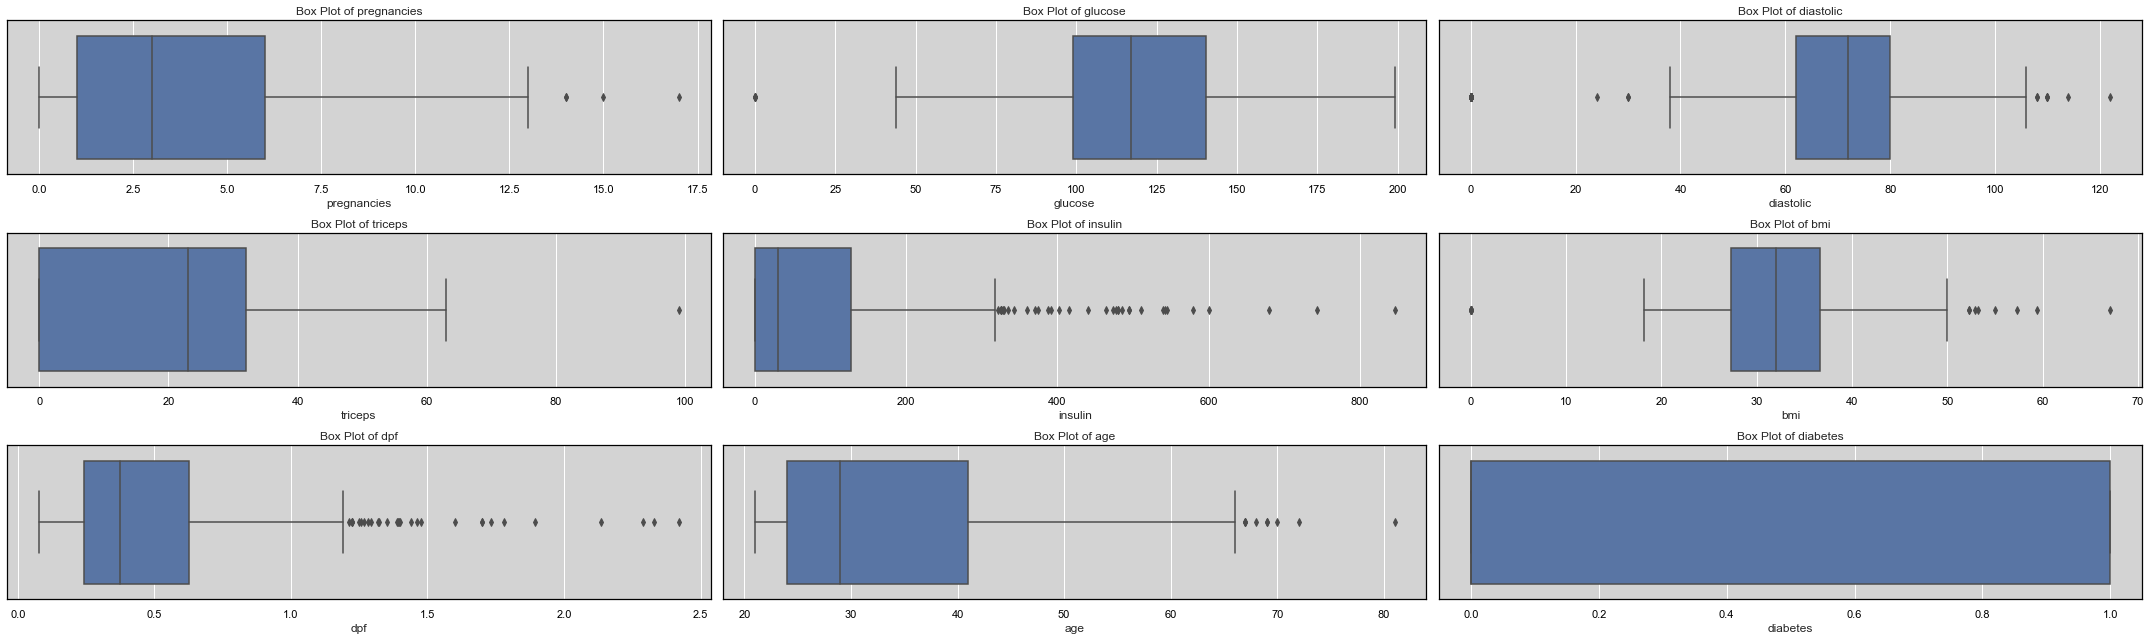

In [18]:
# Plotting
box_plots(df, plots_per_row=3)

### Outlier Detection and Treatment

In data analysis, outliers are data points that significantly differ from the majority of the data. Outliers can skew statistical analysis and model predictions. Therefore, it's essential to detect and treat outliers to ensure the accuracy of data-driven decisions. This notebook explores the concept of outliers, skewness, and kurtosis, and presents a Python code for detecting and treating outliers.

#### **What are Outliers?**

Outliers are data points that deviate significantly from the rest of the data in a dataset. They can occur due to various reasons, such as data entry errors, measurement inaccuracies, or rare events. Outliers can have a substantial impact on statistical analysis, machine learning models, and data visualization. Therefore, it's crucial to identify and address them appropriately.

#### **Skewness and Kurtosis**

Before diving into outlier detection and treatment, let's understand two important statistical concepts:

- **Skewness:** Skewness measures the asymmetry in the distribution of data. A positive skew indicates that the data's right tail is longer or fatter than the left tail, while a negative skew indicates the opposite. Skewed data can influence the presence and impact of outliers.

- **Kurtosis:** Kurtosis measures the "tailedness" or the heaviness of the tails in the data distribution. High kurtosis indicates heavy tails, which means the data has more extreme values and outliers.

#### **Approach to Treat Outliers**

To handle outliers effectively, a multi-step approach is often used:

1. **Outlier Detection:** Identify the outliers in the dataset. Two common methods for outlier detection are the Z-score method and the Interquartile Range (IQR) method.

2. **Assess Treatment Method:** Assess the most suitable outlier treatment method for each feature. The choice of treatment method can depend on the feature's distribution, skewness, and kurtosis. The available treatment methods are:
   - **Impute:** Replace outliers with the mean of non-outlying data points in the same column.
   - **Winsorize:** Cap extreme values by replacing them with the nearest non-outlying values (e.g., replace values above the 99th percentile with the 99th percentile value).
   - **Transform:** Apply mathematical transformations (e.g., log transformation) to reduce the impact of outliers.

3. **Apply Treatment:** Apply the chosen outlier treatment method to the data. This step ensures that outliers are appropriately handled while preserving the integrity of the dataset.

#### **Code for Outlier Detection and Treatment**

We'll use Python and the provided functions to demonstrate the outlier detection and treatment process. The key functions are:

- `detect_outliers`: Detect outliers in a dataset using the Z-score or IQR method.
- `assess_treatment_method`: Assess the most suitable outlier treatment method for a feature based on skewness and kurtosis.
- `treat_outliers`: Apply the chosen outlier treatment method to the data based on feature assessment.

Let's proceed with the code implementation:

In [19]:
# Function to perform outlier detection
def detect_outliers(data, method='IQR', threshold=1):
    """
    Detect outliers in a dataset using the specified method.

    Parameters:
        data (Series or DataFrame): The input data for outlier detection.
        method (str): The method to use for outlier identification ('z-score' or 'IQR').
        threshold (float): The threshold for identifying outliers.

    Returns:
        outliers (DataFrame): A DataFrame containing the detected outliers.
    """
    if method == 'z-score':
        z_scores = np.abs((data - data.mean()) / data.std())
        outliers = data[z_scores > threshold]
    elif method == 'IQR':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
    else:
        raise ValueError("Invalid outlier detection method.")
    
    return outliers

# Function to assess the most suitable outlier treatment method for a feature
def assess_treatment_method(feature_data, skew_threshold=1, kurtosis_threshold=3):
    """
    Assess the most suitable outlier treatment method for a feature based on skewness and kurtosis.

    Parameters:
        feature_data (Series): The data for a specific feature.
        skew_threshold (float): The threshold for skewness to consider a feature as skewed.
        kurtosis_threshold (float): The threshold for kurtosis to consider a feature as having heavy tails.

    Returns:
        treatment_method (str): The recommended outlier treatment method ('impute', 'winsorize', or 'transform').
    """
    
    # Calculate skewness and kurtosis for the feature
    skewness = skew(feature_data)
    kurt = kurtosis(feature_data)
    
    # Assess based on skewness and kurtosis
    if abs(skewness) > skew_threshold:
        # If skewness is above the threshold, consider transformation
        if kurt > kurtosis_threshold:
            return 'transform'  # Transformation for heavy-tailed distributions
        else:
            return 'impute'  # Imputation for skewed but not heavy-tailed distributions
    else:
        return 'winsorize'  # Winsorization for approximately normally distributed data


# Function to apply the chosen outlier treatment method
def treat_outliers(data, target_feature, skew_threshold=1, kurtosis_threshold=3):
    """
    Apply the chosen outlier treatment method to the data based on feature assessment.

    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        skew_threshold (float): The threshold for skewness to consider a feature as skewed.
        kurtosis_threshold (float): The threshold for kurtosis to consider a feature as having heavy tails.

    Returns:
        treated_data (DataFrame): A DataFrame with outliers treated according to the dynamically chosen method.
    """
    treated_data = data.copy()
    
    for column in treated_data.columns:
        if column == target_feature:
            continue  # Skip the treatment for the target feature
            
        # Assess the most suitable outlier treatment method for the feature
        treatment_method = assess_treatment_method(treated_data[column], skew_threshold, kurtosis_threshold)
        
        # Apply the chosen outlier treatment method
        if treatment_method == 'impute':
            # Impute outliers with the mean of non-outlying data points in the same column
            non_outliers_mean = treated_data[column][~treated_data[column].isnull()].mean()
            treated_data.loc[treated_data[column].isnull(), column] = non_outliers_mean
        elif treatment_method == 'winsorize':
            # Apply winsorization to cap extreme values
            Q1 = treated_data[column].quantile(0.25)
            Q3 = treated_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            treated_data[column] = np.where(treated_data[column] < lower_bound, lower_bound, treated_data[column])
            treated_data[column] = np.where(treated_data[column] > upper_bound, upper_bound, treated_data[column])
        elif treatment_method == 'transform':
            # Apply a transformation (e.g., log transformation) to reduce the impact of outliers
            treated_data[column] = np.log(treated_data[column] + 1e-8)  # Adding a small constant to avoid log(0)
    
    return treated_data

In [20]:
# 'IQR' method
outliers_iqr = detect_outliers(data=df)

In [21]:
outliers_iqr.shape

(768, 9)

In [22]:
# Perform outlier treatment
treated_data = treat_outliers(data=df, target_feature='glucose')

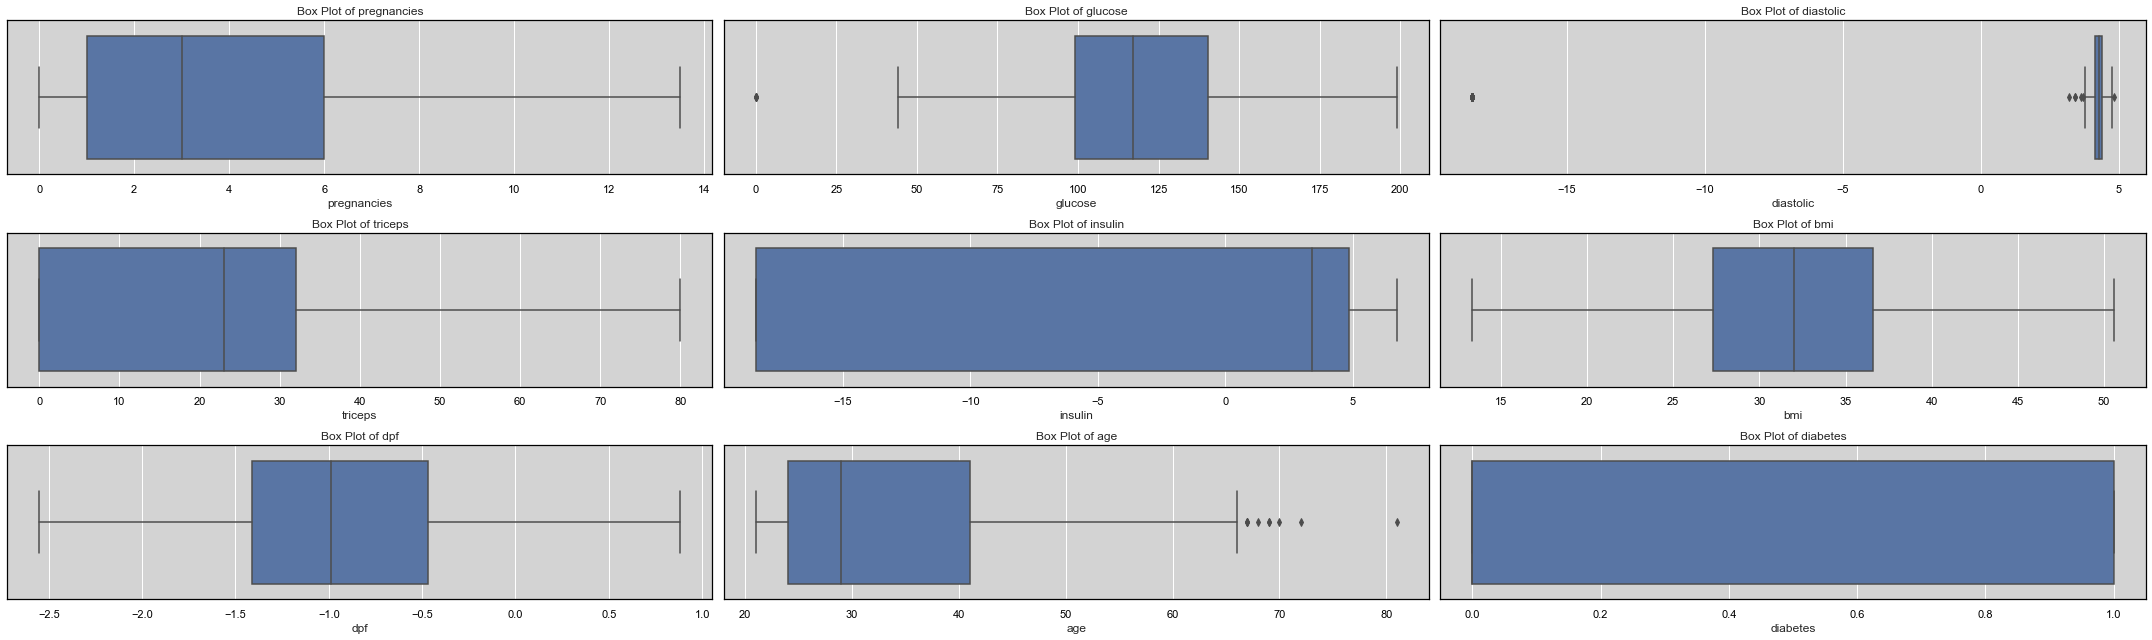

In [23]:
box_plots(treated_data, plots_per_row=3)

In [24]:
def visualize_data_before_after_all(data_before, data_after, target_feature):
    """
    Visualize all features before and after outlier treatment.

    Parameters:
        data_before (DataFrame): The DataFrame containing feature data before outlier treatment.
        data_after (DataFrame): The DataFrame containing feature data after outlier treatment.
        target_feature (str): The name of the target feature.
        
    Returns:
        None
    """
    # Extract feature names from the DataFrame columns (excluding the target feature)
    feature_names = [col for col in data_before.columns if col != target_feature]
    num_features = len(feature_names)
    
    # Create subplots based on the number of features
    fig, axes = plt.subplots(num_features, 2, figsize=(10, num_features * 3))
    
    for i, feature_name in enumerate(feature_names):
        # Plot data before treatment
        # axes[i, 0].hist(data_before[feature_name], bins=20, color='blue', alpha=0.7)
        sns.histplot(data=data_before, x=feature_name, bins=20, color='blue', ax=axes[i, 0])
        axes[i, 0].set_title(f'{feature_name} Before Outlier Treatment', fontsize=10)
        axes[i, 0].set_xlabel(feature_name)
        axes[i, 0].set_ylabel('Frequency')
        
        # Plot data after treatment
        # axes[i, 1].hist(data_after[feature_name], bins=20, color='green', alpha=0.7)
        sns.histplot(data=data_after, x=feature_name, bins=20, color='green', ax=axes[i, 1])
        axes[i, 1].set_title(f'{feature_name} After Outlier Treatment', fontsize=10)
        axes[i, 1].set_xlabel(feature_name)
        axes[i, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

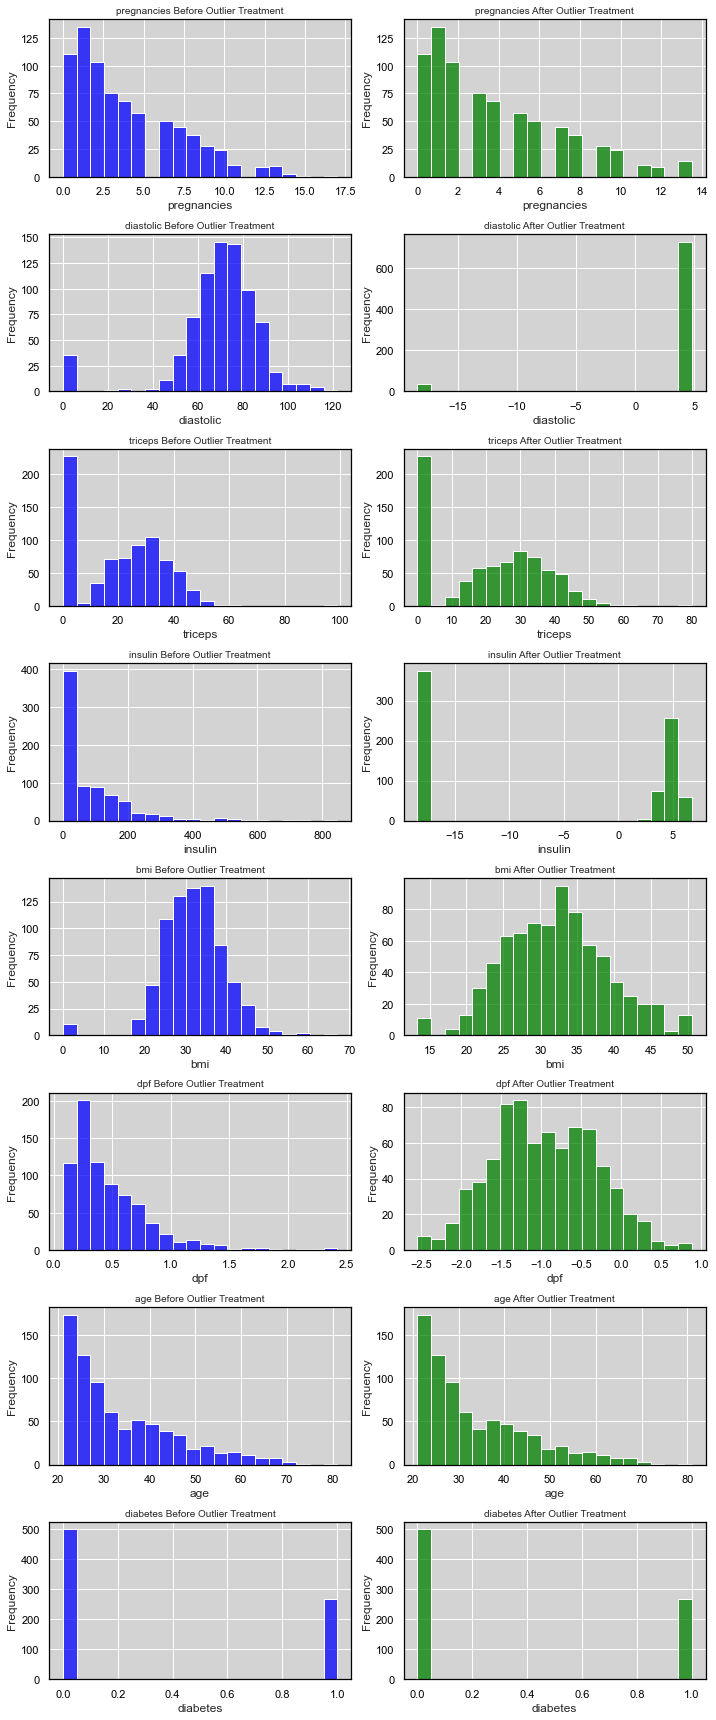

In [25]:
visualize_data_before_after_all(data_before=df, data_after=treated_data, target_feature='glucose')

#### Creating feature and target arrays

In [26]:
X = df.drop('glucose', axis=1).values
y = df['glucose'].values

#### Train Test Split

In [27]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Fit Model

In [28]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

#### Make Pridiction

In [29]:
y_pred = reg.predict(X_test)

#### Analyse Prediction

In [30]:
# R-Squared
reg.score(X_test, y_test)

0.2828046881037517

In [31]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False)

26.341459582232254

#### Cross Validation

In [32]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [33]:
reg_cv = LinearRegression()

In [34]:
cv_results = cross_val_score(reg_cv, X, y, cv=kf)
cv_results

array([0.26207548, 0.28228176, 0.41203082, 0.23785884, 0.41634629,
       0.30398869])

In [35]:
np.mean(cv_results), np.std(cv_results)

(0.3190969786734477, 0.070153206101142)

In [36]:
np.quantile(cv_results, [0.025, 0.975])

array([0.24088592, 0.41580685])

#### Regularization

In [37]:
# Ridge
ridge_scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_scores.append(ridge.score(X_test, y_test))
ridge_scores

[0.28284666232222233,
 0.28320633574804766,
 0.2853000732200004,
 0.26423984812668133,
 0.19292424694100963]

In [38]:
# Lasso
lasso_scores = []
for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_scores.append(lasso.score(X_test, y_test))
lasso_scores

[0.2857532569482625,
 0.29795609755827845,
 0.17989838789273882,
 0.18127361610181125,
 0.15679544303617965]

#### Feature Selection

In [39]:
X = df.drop('glucose', axis=1).values
y = df['glucose'].values
names = df.drop('glucose', axis=1).columns

In [40]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

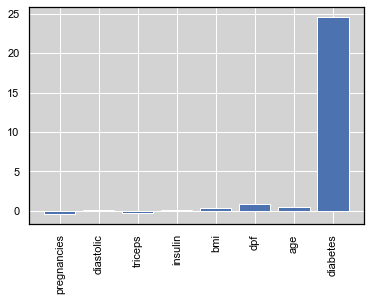

In [41]:
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()